In [536]:
import matplotlib.pyplot as plt
from random import uniform, sample, random
import pandas as pd
import seaborn as sns
%matplotlib inline

In [537]:
def sinal(x, y): # função limiar escolhida foi a função degrau, com o somatório das entradas pelos pesos embutidos
    if x*pesos[0] + y*pesos[1] + pesos[2]*1 >= 0:
        return 1
    else:
        return -1

def soma_listas(x, y): # operação de soma entre duas matrizes
    return [i + k for i, k in zip(x, y)]

def multiplica_valor(valor, x): # operação c*X onde c é um escalar e X uma matriz
    return [valor * i for i in x]

def aprendizado(dados):
    for i, k, j in dados:    
        if sinal(i, k) != j: # verifica se o valor retornado é diferente do correto
            global pesos
            # atualização dos pesos abaixo, operação W_(t+1) = W_t + c * (d_t - sinal(X_t * W_t)) * X_t
            pesos = soma_listas(pesos, multiplica_valor(0.2 * (j - sinal(i, k)), [i, k, sinal(i, k)]))

def figura(x): # função apenas para calcular a reta gerada pelos pesos, já isolando em termos de y
    return -(pesos[0]*x)/pesos[1] - pesos[2]/pesos[0] # W0*x + w1*y + W2 = 0 ==> y = -(W0/w1)*x - (W2/w1)

def classes(x): # função para classificar os valores gerados automaticamente
    if x <= 4:
        return 1 # classe 1
    else:
        return -1 # classe 2

In [538]:
classe1 = [(uniform(0, 4), uniform(0, 4), 1) for _ in range(250)] # declarando valores da classe 1
classe2 = [(uniform(6, 10), uniform(6, 10), -1) for _ in range(250)]  # declarando valores da classe 2
dados = classe1 + classe2 # unindo os valores gerados
dados = sample(dados, len(dados)) # misturando os valores gerados

X = []
for i in range(250): # armazenando as coordenadas em x de todos os pontos
    X.append(dados[i][0])

Y = []
for i in range(250): # armazenando as coordenadas em y de todos os pontos
    Y.append(dados[i][1])

global pesos
pesos = [random(), random(), random()] # gerando pesos aleatórios

In [539]:
aprendizado(dados) # 

(0, 10)

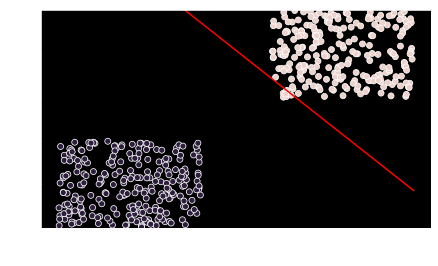

In [540]:
plt.figure(figsize=(7, 4))
plt.style.use('dark_background')
dtf = pd.DataFrame(dados, columns=['x', 'y', 'classe']) # transformando os dados em um DataFrame
sns.scatterplot(dtf['x'], dtf['y'], hue = dtf['classe'], legend = False) # plotando os pontos

x = [i for i in range(11)] # gerando a linha reta que divide os valores
y = [figura(i) for i in x]
plt.plot(x, y, c = 'red')
plt.ylim(0, 10)

In [535]:
dados[:4]

[(1.0651584689332108, 0.7431619665437723, 1),
 (0.5388496003514276, 0.6236460566753106, 1),
 (9.57598867622874, 8.765015980917168, -1),
 (0.5405394093186993, 1.4005394906544328, 1)]

In [479]:
pesos

[67.57239717596137, 67.84412529834864, -1215.6274629173558]